In [1]:
import numpy as np
import pandas as pd
!pip uninstall tensorflow
!pip uninstall tensorflow_text
!pip install tensorflow==2.9.0
import tensorflow as tf
print(tf.__version__)
!pip install tensorflow-text
import tensorflow_text as text
!pip install --upgrade tensorflow_hub
import tensorflow_hub as hub
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
from tqdm import tqdm
import sys  
!{sys.executable} -m pip install contractions
import contractions
!{sys.executable} -m pip install focal_loss
import focal_loss
!{sys.executable} -m pip install sentence_transformers
import sentence_transformers
print("Environmental packages imported")

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 3.0 kB/s 
     |████████████████████████████████| 5.8 MB 53.4 MB/s 
     |████████████████████████████████| 1.6 MB 52.4 MB/s 
     |████████████████████████████████| 438 kB 29.9 MB/s 
  Attempting uninstall: tensorflow-estimator
  

# **1.0 Data loading**
The dataset is divided in:

Arguments (arg_id, argument, topic, stance);
Keypoint (key_point_id, keypoint, topic, stance);
Labels (arg_id, key_point_id, label).
Each dataset has its own split (train, dev and test). The dataset is directly loaded via url from the GitHub repository.

In [2]:
argument_label = "argument"
topic_label = "topic"
key_point_lable = "key_point"
stance_label = "stance"
arg_id_label = 'arg_id'
kp_id_label = 'key_point_id'
label_label = 'label'


## Arguments dataset loading.
arguments_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/kpm_data/arguments_train.csv')
arguments_dev = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/kpm_data/arguments_dev.csv')
arguments_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/test_data/arguments_test.csv')

no_argunents_in_arguments_train = len(arguments_train[argument_label].unique())
print(f'There are {no_argunents_in_arguments_train} arguments in the Arguments train set.\n')

no_argunents_in_arguments_dev = len(arguments_dev[argument_label].unique())
print(f'There are {no_argunents_in_arguments_dev} arguments in the Arguments debelopment set.\n')

no_argunents_in_arguments_test = len(arguments_test[argument_label].unique())
print(f'There are {no_argunents_in_arguments_test} arguments in the Arguments test set.\n')



no_topics_in_arguments_train = len(arguments_train[topic_label].unique())
print(f'There are {no_topics_in_arguments_train} topic in the Arguments train set.\n')

no_topics_in_arguments_dev = len(arguments_dev[topic_label].unique())
print(f'There are {no_topics_in_arguments_dev} topic in the Arguments development set.\n')

no_topics_in_arguments_test = len(arguments_test[topic_label].unique())
print(f'There are {no_topics_in_arguments_test} topic in the Arguments test set.\n')




arguments_test.head()

There are 5583 arguments in the Arguments train set.

There are 932 arguments in the Arguments debelopment set.

There are 723 arguments in the Arguments test set.

There are 24 topic in the Arguments train set.

There are 4 topic in the Arguments development set.

There are 3 topic in the Arguments test set.



,arg_id,argument,topic,stance
0,arg_0_0,Routine child vaccinations isn't mandatory sin...,Routine child vaccinations should be mandatory,-1
1,arg_0_1,Routine child vaccinations should not be manda...,Routine child vaccinations should be mandatory,-1
2,arg_0_2,Routine child vaccinations should not be neces...,Routine child vaccinations should be mandatory,-1
3,arg_0_3,A vaccine that has not been sufficiently teste...,Routine child vaccinations should be mandatory,-1
4,arg_0_4,As long as vaccines are not free of side effec...,Routine child vaccinations should be mandatory,-1


In [3]:
## Key-points dataest loading.
key_points_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/kpm_data/key_points_train.csv')
key_points_dev = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/kpm_data/key_points_dev.csv')
key_points_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/test_data/key_points_test.csv')




no_kp_in_kp_train = len(key_points_train[key_point_lable].unique())
print(f'There are {no_kp_in_kp_train} points in the points train set.\n')

no_kp_in_kp_dev = len(key_points_dev[key_point_lable].unique())
print(f'There are {no_kp_in_kp_dev} points in the points debelopment set.\n')

no_kp_in_kp_test = len(key_points_test[key_point_lable].unique())
print(f'There are {no_kp_in_kp_test} points in the points test set.\n')

no_topics_in_kp_train = len(key_points_train[topic_label].unique())
print(f'There are {no_topics_in_kp_train} topics in the Key-points train set.\n')

no_topics_in_kp_dev = len(key_points_dev[topic_label].unique())
print(f'There are {no_topics_in_kp_dev} topics in the Key-points development set.\n')

no_topics_in_kp_test = len(key_points_test[topic_label].unique())
print(f'There are {no_topics_in_kp_test} topics in the Key-points test set.\n')

# key_points_train.head()
# key_points_dev.head()
key_points_test.head()

There are 207 points in the points train set.

There are 36 points in the points debelopment set.

There are 33 points in the points test set.

There are 24 topics in the Key-points train set.

There are 4 topics in the Key-points development set.

There are 3 topics in the Key-points test set.



,key_point_id,key_point,topic,stance
0,kp_0_0,"Routine child vaccinations, or their side effe...",Routine child vaccinations should be mandatory,-1
1,kp_0_1,Mandatory vaccination contradicts basic rights,Routine child vaccinations should be mandatory,-1
2,kp_0_2,The parents and not the state should decide,Routine child vaccinations should be mandatory,-1
3,kp_0_3,Routine child vaccinations are not necessary t...,Routine child vaccinations should be mandatory,-1
4,kp_0_4,Routine child vaccinations are effective,Routine child vaccinations should be mandatory,1


In [4]:
## Labels dataset loading.
labels_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/kpm_data/labels_train.csv')
labels_dev = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/kpm_data/labels_dev.csv')
labels_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/IBM/KPA_2021_shared_task/main/test_data/labels_test.csv')




no_arg_id_in_kp_train = len(labels_train[arg_id_label].unique())
print(f'There are {no_kp_in_kp_train} points in the points train set.\n')

no_arg_id_in_kp_dev = len(labels_dev[arg_id_label].unique())
print(f'There are {no_kp_in_kp_dev} points in the points debelopment set.\n')

no_arg_id_in_kp_test = len(labels_test[arg_id_label].unique())
print(f'There are {no_kp_in_kp_test} points in the points test set.\n')

no_kp_id_in_kp_train = len(labels_train[kp_id_label].unique())
print(f'There are {no_topics_in_kp_train} topics in the Key-points train set.\n')

no_kp_id_in_kp_dev = len(labels_dev[kp_id_label].unique())
print(f'There are {no_topics_in_kp_dev} topics in the Key-points development set.\n')

no_kp_id_in_kp_test = len(labels_test[kp_id_label].unique())
print(f'There are {no_topics_in_kp_test} topics in the Key-points test set.\n')

print(f'Total number of argument-key point paris is in label train dataset is: {len(labels_train)} ')

print(f'Total number of argument-key point paris is in label development dataset is: {len(labels_dev)} ')

print(f'Total number of argument-key point paris is in label test dataset is: {len(labels_test)} ')



labels_train.head()
labels_dev.head()
labels_test.head()

There are 207 points in the points train set.

There are 36 points in the points debelopment set.

There are 33 points in the points test set.

There are 24 topics in the Key-points train set.

There are 4 topics in the Key-points development set.

There are 3 topics in the Key-points test set.

Total number of argument-key point paris is in label train dataset is: 20635 
Total number of argument-key point paris is in label development dataset is: 3458 
Total number of argument-key point paris is in label test dataset is: 3426 


,arg_id,key_point_id,label
0,arg_0_112,kp_0_4,0
1,arg_0_112,kp_0_5,0
2,arg_0_112,kp_0_6,0
3,arg_0_112,kp_0_7,1
4,arg_0_0,kp_0_0,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
## Balance of the train dataset.
print(f"There are {np.sum(labels_train['label'].tolist())} positive samples and {len(labels_train['label']) - np.sum(labels_train['label'].tolist())} negative samples over {len(labels_train['label'])} samples of the training set.")
## Balance of the dev dataset.
print(f"There are {np.sum(labels_dev['label'].tolist())} positive samples and {len(labels_dev['label']) - np.sum(labels_dev['label'].tolist())} negative samples over {len(labels_dev['label'])} samples of the development set.")
## Balance of the test dataset.
print(f"There are {np.sum(labels_test['label'].tolist())} positive samples and {len(labels_test['label']) - np.sum(labels_test['label'].tolist())} negative samples over {len(labels_test['label'])} samples of the test set.")

There are 4260 positive samples and 16375 negative samples over 20635 samples of the training set.
There are 738 positive samples and 2720 negative samples over 3458 samples of the development set.
There are 552 positive samples and 2874 negative samples over 3426 samples of the test set.


# ***Some Tool Functions***

In [6]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score, PrecisionRecallDisplay, roc_curve, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, average_precision_score, PrecisionRecallDisplay, ConfusionMatrixDisplay
import sklearn
from sklearn.metrics import precision_recall_curve
from numpy import argmax

def listFlatten(src):
    tmp = []
    for i in src:
        if type(i) is not list:
            tmp.append(i)
        else:
            tmp.extend(listFlatten(i))
    return tmp


def evaluate_classifier(predictions, true_labels):

  ## Threshold tuning.
  fpr, tpr, thresholds = roc_curve(true_labels, predictions)
  thr = thresholds[np.argmin(np.abs(fpr + tpr - 1))]

  predictions_thr = np.zeros(predictions.shape)
  predictions_thr[predictions >= thr] = 1

  print(classification_report(predictions_thr, true_labels))
    
  print(f'The average precision score is: {average_precision_score(true_labels, predictions_thr)}.')
  print(f'The balanced accuracy score is: {balanced_accuracy_score(true_labels, predictions_thr)}.')
  print(f'The tuned threshold is: {thr}.')

  print(f'The confusion matrix is: ')
  ConfusionMatrixDisplay.from_predictions(true_labels, predictions_thr)

  PrecisionRecallDisplay.from_predictions(true_labels, predictions)

true_values = labels_test['label'].tolist()

# **2.0 Data processing**

# **2.1 Text cleaning**
The text cleaning consists in lowercase every letter, expand abbreviations and verbal contractions, remove possible special characters and uncommon symbols.

Notice that the new dataframes override the previous ones.

In [7]:
import re
import nltk

## Lowercase
def lowercase(text: str) -> str:
    return text.lower()

## Expand abbreviations and verbal contractions.
def expand(text: str) -> str:
    return contractions.fix(text)

## Remove special characters.
def replace_special_characters(text: str) -> str:
    replace_symbols = re.compile('[/(){}\[\]\|@,;]')
    return replace_symbols.sub(' ', text)

def filter_out_uncommon_symbols(text: str) -> str:
    good_symbols = re.compile('[^0-9a-z #+_]')
    return re.sub(good_symbols, '', text)

## Pandas defined each column as a Series object, use series.str to do string operation on it.
def preprocess_text(text: str) -> str:
    return filter_out_uncommon_symbols(replace_special_characters(expand(lowercase(text))))
    
def cleanning(dataframe, labels: list):
    print('Before preprocess : \n')
    print(dataframe[labels].head(5))
    for label in labels:
        dataframe[label] = dataframe[label].apply(lambda txt: preprocess_text(txt))
    print("\n")
    print('After preprocess : \n')
    print(dataframe[labels].head(5))
    print("\n")

arguments_dataset_list = [arguments_train, arguments_dev, arguments_test]
arguments_labels_list = ['argument', 'topic']

key_points_datasets_list = [key_points_train, key_points_dev, key_points_test]
key_points_labels_list = ['key_point', 'topic']

for dataset in arguments_dataset_list:
    cleanning(dataset, arguments_labels_list)
for dataset in key_points_datasets_list:
    cleanning(dataset, key_points_labels_list)

Before preprocess : 

                                            argument  \
0  `people reach their limit when it comes to the...   
1  A patient should be able to decide when they h...   
2  a person has the right to end their suffering ...   
3  a person should have the dignity to choose how...   
4  a person should have the right to be able to c...   

                                           topic  
0  Assisted suicide should be a criminal offence  
1  Assisted suicide should be a criminal offence  
2  Assisted suicide should be a criminal offence  
3  Assisted suicide should be a criminal offence  
4  Assisted suicide should be a criminal offence  


After preprocess : 

                                            argument  \
0  people reach their limit when it comes to thei...   
1  a patient should be able to decide when they h...   
2  a person has the right to end their suffering ...   
3  a person should have the dignity to choose how...   
4  a person should have the righ

# **2.2 Text tokenization**
Text tokenization consists into split a whole sentencences into meaningful pieces of it. It is achieved with the punkt tokenizer by NLTK.

In [8]:
## Create copies of the processed dataframes.
arguments_train_token = arguments_train.copy()
arguments_dev_token = arguments_dev.copy()
arguments_test_token = arguments_test.copy()

key_points_train_token = key_points_train.copy()
key_points_dev_token = key_points_dev.copy()
key_points_test_token = key_points_test.copy()

from nltk.tokenize import wordpunct_tokenize
def tokenize_dataset(dataframes: list, labels: list):
  for df in dataframes:
    for label in labels:
      df[label] = df[label].apply(wordpunct_tokenize)
print("start")
tokenize_dataset([arguments_train_token, arguments_dev_token, arguments_test_token], labels = arguments_labels_list)
tokenize_dataset([key_points_train_token, key_points_dev_token, key_points_test_token], labels = key_points_labels_list)
print("done")
arguments_test_token.head()

start
done


,arg_id,argument,topic,stance
0,arg_0_0,"[routine, child, vaccinations, is, not, mandat...","[routine, child, vaccinations, should, be, man...",-1
1,arg_0_1,"[routine, child, vaccinations, should, not, be...","[routine, child, vaccinations, should, be, man...",-1
2,arg_0_2,"[routine, child, vaccinations, should, not, be...","[routine, child, vaccinations, should, be, man...",-1
3,arg_0_3,"[a, vaccine, that, has, not, been, sufficientl...","[routine, child, vaccinations, should, be, man...",-1
4,arg_0_4,"[as, long, as, vaccines, are, not, free, of, s...","[routine, child, vaccinations, should, be, man...",-1


# **3.0 The Key-Points Matching problem**
Given a controversial topic  T  with a list of  m  arguments and  n  key points:

A1,A2,…,Am ;
K1,K2,…,Kn ,
along with their corresponding  m+n  stances:

S1,S2,…,Sm+n ;
with  Si∈{−1,1} , which imply the attack or support relationships against the topic, the task is to rank key points that have the same stance with an input argument by the matching score.

This priority is dependent on both the topic and the semantic of statements.

# **3.1 Unsupervised approaches**


Pre-trained embeddings
It is possible to use pre-trained embeddings to measure the "distance" of each pair of keyword and argument.

GloVe is a context independent model that computes a single embedding for each word, while BERT is a contextualized embedding model that takes the entire sentence into account.

Again, we use cosine similarity to compute the match score.

For each method it is possible to decide wether to consider also topic and stance.

#### **GloVe embeddings**
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.


The training objective of GloVe is to learn word vectors such that their dot product equals the logarithm of the words' probability of co-occurrence. Owing to the fact that the logarithm of a ratio equals the difference of logarithms, this objective associates (the logarithm of) ratios of co-occurrence probabilities with vector differences in the word vector space. Because these ratios can encode some form of meaning, this information gets encoded as vector differences as well. 

#####  **Out-of-vocaboulary terms & embedding**
At first some functions to handle OOVs terms and token embeddings are define. In particular:
* `build_vocaboulary`: create a double vocaboulary from a dataframe to mantain encode and decode tokens;
* `load_glove_embedding`: given a chosen embedding dimension, it downloads the corresponding pre-trained corpus;
* `get_OOV_terms`: given a vocaboulary and a word listings returns the set of OOV terms;
* `build_embedding_matrix`: returns the matrix to pass to the embedding layer as kernel initializer.

In [9]:
import gensim
import gensim.downloader as gloader

## Load pre trained GloVe model
def load_glove_embedding(embedding_dimension):
    download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    return gloader.load(download_path)

## Build vocabulary
def build_vocabulary(dataset):
  idx2word = {}
  word2idx = {}
  word_idx = 0
  for sentence in dataset:
    for word in sentence:
      if word not in word2idx.keys():
        word2idx[word] = word_idx
        idx2word[word_idx] = word
        word_idx += 1

  word_list = list(word2idx.keys())
  return idx2word, word2idx, word_list

## Extraction of words out of vocabulary
def get_OOV_terms(embedding_model, word_list):
  embedding_vocabulary = set(embedding_model.vocab.keys())
  oov = set(word_list).difference(embedding_vocabulary)
  return list(oov)

## Build the embedding metrix from GloVe and word2idx 
def build_embedding_metrix(glove_model, embedding_dimension, word2idx, vocabulary_size):
  embedding_matrix = np.zeros((vocabulary_size, embedding_dimension), dtype = np.float32) 
  for word, idx in word2idx.items():
    try:
      embedding_vector = glove_model[word]
    except(KeyError, TypeError):
      embedding_vector = np.random.uniform(low = -0.1, high = 0.1, size = embedding_dimension)
    embedding_matrix[idx] = embedding_vector
  return embedding_matrix
      


In [ ]:
## Build the whole embedding metrix for terain, dev and test set
embedding_dimension = 300


## 1. Load the pretrained GloVe model
## NOTICE: Load pre trained GloVe model takes a while
pre_trained_GloVe_model = load_glove_embedding(embedding_dimension)


## 2. Merge all sentences of train, dev and test dataset
sentences_in_train_arguments = arguments_train_token[argument_label]
sentences_in_dev_arguments = arguments_dev_token[argument_label]
sentences_in_test_arguments = arguments_test_token[argument_label]

sentences_in_train_topic = arguments_train_token[topic_label]
sentences_in_dev_topic = arguments_dev_token[topic_label]
sentences_in_test_topic = arguments_test_token[topic_label]
                                                     
sentences_in_train_key_points = key_points_train_token[key_point_lable]
sentences_in_dev_key_points = key_points_dev_token[key_point_lable]
sentences_in_test_key_points = key_points_test_token[key_point_lable]

sentences = pd.concat([sentences_in_train_arguments, sentences_in_dev_arguments, sentences_in_test_arguments, 
                      sentences_in_train_topic, sentences_in_dev_topic, sentences_in_test_topic,
                      sentences_in_train_key_points, sentences_in_dev_key_points, sentences_in_test_key_points])
## 3. Build vocabulary
idx2word, word2idx, word_list = build_vocabulary(sentences)
print(f"The length of idx2word is {len(idx2word)}.")
print(f'Show index to words list: {idx2word}')
print(f"The length of word2idx is {len(word2idx)}.")
print(f'Show words to index list: {word2idx}')
print(f"The length of word_list is {len(word_list)}.")
print(f"We have over all {len(word_list)} words in dataset.")
print(f'Show words list: {word_list}.')

## 4. Extract OOV 
oov_terms = get_OOV_terms(pre_trained_GloVe_model, word_list)
print(f"The length of oov_terms is {len(oov_terms)}")
print(f"We have over all {len(oov_terms)} out of vocabulary of GloVe words in out dataset.")
print(f'Show out of vocabulary of GloVe words list: {oov_terms}.')

## 5. Build embedding metrix
embedding_metrix = build_embedding_metrix(pre_trained_GloVe_model, embedding_dimension, word2idx, len(word_list))
print(f"The shape of embedded metrix is {embedding_metrix.shape}.")







# **Dataset encoding**

The datasets are encoded and aligned with the respective identifiers.

In [11]:
def encode_sentence(sentence, word2idx):
  return [word2idx[words] for words in sentence]

def encode_dataframe(dataframe, word2idx, labels):
  encoded_dataframe = pd.DataFrame(columns = labels)
  for label in labels:
    encoded_dataframe[label] = dataframe[label].apply(lambda sentence: encode_sentence(sentence, word2idx))
  return encoded_dataframe

## The dataset is encoded and then the id columns restored.
arguments_train_encoded = encode_dataframe(arguments_train_token, word2idx, [argument_label, topic_label])
arguments_train_encoded['arg_id'] = arguments_train['arg_id']

arguments_dev_encoded = encode_dataframe(arguments_dev_token, word2idx, [argument_label, topic_label])
arguments_dev_encoded['arg_id'] = arguments_dev['arg_id']

arguments_test_encoded = encode_dataframe(arguments_test_token, word2idx, [argument_label, topic_label])
arguments_test_encoded['arg_id'] = arguments_test['arg_id']

key_points_train_encoded = encode_dataframe(key_points_train_token, word2idx, [key_point_lable, topic_label])
key_points_train_encoded['key_point_id'] = key_points_train['key_point_id']

key_points_dev_encoded = encode_dataframe(key_points_dev_token, word2idx, [key_point_lable, topic_label])
key_points_dev_encoded['key_point_id'] = key_points_dev['key_point_id']

key_points_test_encoded = encode_dataframe(key_points_test_token, word2idx, [key_point_lable, topic_label])
key_points_test_encoded['key_point_id'] = key_points_test['key_point_id']

# **Labels alignment**


The pairs of argument and key-point pairs identifier are extracted. With these pairs the encoded arguments and key-points are extracted.

Topic and stance gives the “main context”. The argument and the key-point can also be integrated with this main context and then matched.

In [12]:
from keras.utils import pad_sequences
## Find the longest sentence in train and dev dataset
train_argument_length = max([len(i) for i in arguments_train_token[argument_label]])
print(f'The max length of sentences in arguments_train_token with label argument is {train_argument_length}.')

train_topic_length = max([len(sentence) for sentence in arguments_train_token[topic_label]])
print(f'The max length of sentences in arguments_train_token with label topic is {train_topic_length}.')

dev_argument_length = max([len(sentence) for sentence in arguments_dev_token[argument_label]])
print(f'The max length of sentences in arguments_dev_token with label argument is {dev_argument_length}.')

dev_topic_length = max([len(sentence) for sentence in arguments_dev_token[topic_label]])
print(f'The max length of sentences in arguments_train_token with label topic is {dev_topic_length}.')

maxlen = max(max(train_argument_length, train_topic_length), max(dev_argument_length, dev_topic_length))
print(f'The max length of sentences is {maxlen}.')

## Flatten a nested list.
def flatten(t):
  return [item for sublist in t for item in sublist]

indexes = [i for i in range(len(labels_test))]

## Generations of pairs arg-kp of the test set.
arg_id = [labels_test['arg_id'][k] for k in indexes]
kp_id = [labels_test['key_point_id'][k] for k in indexes]

## Arguments extraction.
arguments = flatten([arguments_test_encoded.loc[arguments_test_encoded['arg_id'] == arg]['argument'].tolist() for arg in arg_id])
arguments = pad_sequences(arguments, maxlen = maxlen, padding = 'post')
paded_arguments = zip(arg_id, list(arguments))

from sklearn.metrics.pairwise import cosine_similarity

## Key-points extraction.
keypoints = flatten([key_points_test_encoded.loc[key_points_test_encoded['key_point_id'] == kp]['key_point'].tolist() for kp in kp_id])
keypoints = pad_sequences(keypoints, maxlen = maxlen, padding = 'post')
paded_key_points = zip(kp_id, list(keypoints))

## Topics extraction.
topics = flatten([arguments_test_encoded.loc[arguments_test_encoded['arg_id'] == arg]['topic'].tolist() for arg in arg_id])
topics = pad_sequences(keypoints, maxlen = maxlen, padding = 'post')
paded_topics = zip(arg_id, list(topics))

The max length of sentences in arguments_train_token with label argument is 44.
The max length of sentences in arguments_train_token with label topic is 9.
The max length of sentences in arguments_dev_token with label argument is 41.
The max length of sentences in arguments_train_token with label topic is 10.
The max length of sentences is 44.


# **GloVe application**

GloVe embedding matrix is applied, unrolling the vectors in order to apply the cosine similarity.

# **Cosine similarity calculation and evaluation**

Cosine similarity is evaluated wether if the topic is considered or not. The general performances are worsened if the topic is taken into account, but the average precision score is higher in the latter case.

The cause can be the redundacy in of the such feature.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
## Calculate score without topic
score_arguments_to_kp_with_topic_sum_vector = {}
predictions_sum_vector_with_topic = []

score_arguments_to_kp_without_topic_sum_vector = {}
predictions_sum_vector_without_topic = []

score_arguments_to_kp_without_topic = {}
predictions_GloVe_without_topic = []

score_arguments_to_kp_with_topic = {}
predictions_GloVe_with_topic = []

paded_arguments_list = list(paded_arguments)
paded_key_points_list = list(paded_key_points)
paded_topics_list = list(paded_topics)

threshold = 0.9

for i in range(len(indexes)):

  arg_id = paded_arguments_list[i][0]
  kp_id = paded_key_points_list[i][0]

  embedded_argument = embedding_metrix[paded_arguments_list[i][1]]
  embedded_argument_sum_vector = embedded_argument.sum(axis = 0).reshape(1, -1)
  embedded_argument = embedded_argument.reshape(1, -1)

  embedded_key_points = embedding_metrix[paded_key_points_list[i][1]]
  embedded_key_points_sum_vector = embedded_key_points.sum(axis = 0).reshape(1, -1)
  embedded_key_points = embedded_key_points.reshape(1, -1)

  embedded_arguments_topic = embedding_metrix[np.concatenate((paded_arguments_list[i][1], paded_topics_list[i][1]), axis = -1)]
  embedded_arguments_topic_sum_vector = embedded_arguments_topic.sum(axis = 0).reshape(1, -1)
  embedded_arguments_topic = embedded_arguments_topic.reshape(1, -1)

  embedded_keypoints_topic = embedding_metrix[np.concatenate((paded_key_points_list[i][1], paded_topics_list[i][1]), axis = -1)]
  embedded_keypoints_topic_sum_vector = embedded_keypoints_topic.sum(axis = 0).reshape(1, -1)
  embedded_keypoints_topic = embedded_keypoints_topic.reshape(1, -1)

  score_without_topic = cosine_similarity(embedded_argument, embedded_key_points)
  score_with_tpopic = cosine_similarity(embedded_arguments_topic, embedded_keypoints_topic)
  score_without_topic_sum_vector = cosine_similarity(embedded_argument_sum_vector, embedded_key_points_sum_vector)
  score_with_topic_sum_vector = cosine_similarity(embedded_arguments_topic_sum_vector, embedded_keypoints_topic_sum_vector)


  predictions_sum_vector_with_topic.append(listFlatten(score_with_topic_sum_vector))
  predictions_sum_vector_without_topic.append(listFlatten(score_without_topic_sum_vector))
  predictions_GloVe_without_topic.append(listFlatten(score_without_topic))
  predictions_GloVe_with_topic.append(listFlatten(score_with_tpopic))
  if arg_id in score_arguments_to_kp_without_topic.keys():
    score_arguments_to_kp_without_topic[arg_id][kp_id] = score_without_topic
    score_arguments_to_kp_with_topic[arg_id][kp_id] = score_with_tpopic
    score_arguments_to_kp_with_topic_sum_vector[arg_id][kp_id] = score_with_topic_sum_vector
    score_arguments_to_kp_without_topic_sum_vector[arg_id][kp_id] = score_without_topic_sum_vector
  else:
    score_arguments_to_kp_without_topic[arg_id] = {kp_id: score_without_topic}
    score_arguments_to_kp_with_topic[arg_id] = {kp_id: score_with_tpopic}
    score_arguments_to_kp_with_topic_sum_vector[arg_id] = {kp_id: score_with_topic_sum_vector}
    score_arguments_to_kp_without_topic_sum_vector[arg_id] = {kp_id: score_without_topic_sum_vector}
print('score without topic: ',score_arguments_to_kp_without_topic)
print('score with topic: ',score_arguments_to_kp_with_topic)
print(predictions_GloVe_without_topic)


# **GloVe Model Evaluation**

Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score without topic data
              precision    recall  f1-score   support

         0.0       0.47      0.82      0.60      1641
         1.0       0.47      0.15      0.22      1785

    accuracy                           0.47      3426
   macro avg       0.47      0.48      0.41      3426
weighted avg       0.47      0.47      0.40      3426

The average precision score is: 0.15360289576375236.
The balanced accuracy score is: 0.4691178027896281.
The tuned threshold is: 0.7843729257583618.
The confusion matrix is: 


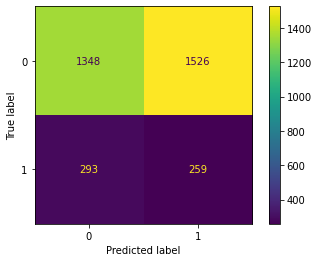

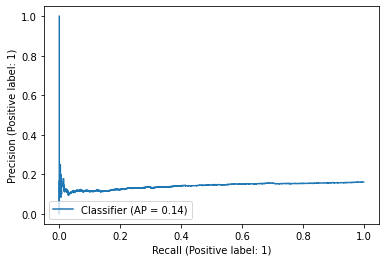

In [14]:
print("Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score without topic data")
evaluate_classifier(np.asarray(listFlatten(predictions_GloVe_without_topic)), true_values)

Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score with topic data
              precision    recall  f1-score   support

         0.0       0.46      0.82      0.59      1630
         1.0       0.47      0.14      0.22      1796

    accuracy                           0.47      3426
   macro avg       0.47      0.48      0.41      3426
weighted avg       0.47      0.47      0.40      3426

The average precision score is: 0.1529563187448202.
The balanced accuracy score is: 0.4661243230159451.
The tuned threshold is: 0.8927079439163208.
The confusion matrix is: 


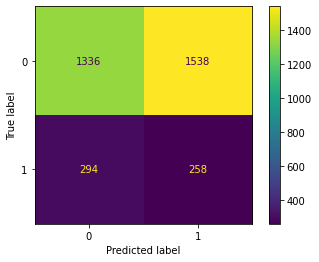

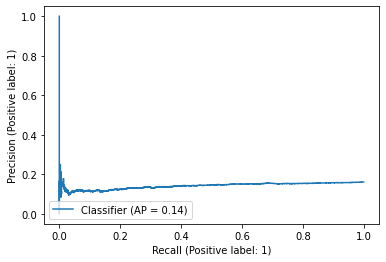

In [15]:
print("Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score with topic data")
evaluate_classifier(np.asarray(listFlatten(predictions_GloVe_with_topic)), true_values)

Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score without topic data in vector sum
              precision    recall  f1-score   support

         0.0       0.50      0.84      0.62      1705
         1.0       0.50      0.16      0.24      1721

    accuracy                           0.50      3426
   macro avg       0.50      0.50      0.43      3426
weighted avg       0.50      0.50      0.43      3426

The average precision score is: 0.1601722253972267.
The balanced accuracy score is: 0.4964486702369066.
The tuned threshold is: 0.9885216951370239.
The confusion matrix is: 


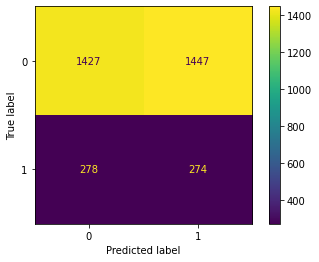

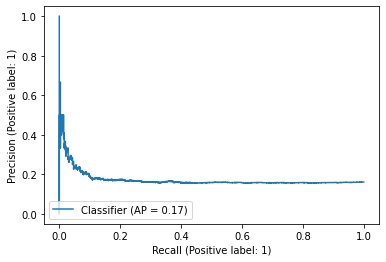

In [16]:
print("Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score without topic data in vector sum")
evaluate_classifier(np.asarray(listFlatten(predictions_sum_vector_without_topic)), true_values)

Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score with topic data in vector sum
              precision    recall  f1-score   support

         0.0       0.49      0.84      0.62      1700
         1.0       0.49      0.16      0.24      1726

    accuracy                           0.49      3426
   macro avg       0.49      0.50      0.43      3426
weighted avg       0.49      0.49      0.43      3426

The average precision score is: 0.1593809090507235.
The balanced accuracy score is: 0.4934192611418716.
The tuned threshold is: 0.997416615486145.
The confusion matrix is: 


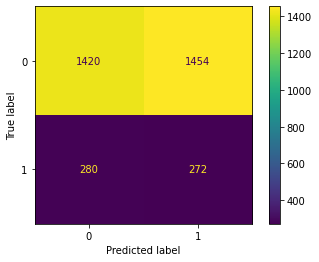

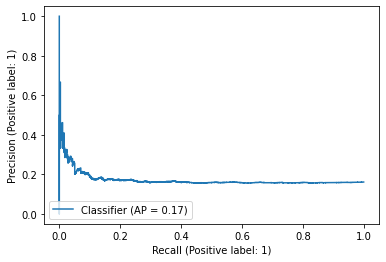

In [17]:
print("Model Evaluation -- Unsupervised Model: GloVe Embedding, arguments to key points score with topic data in vector sum")
evaluate_classifier(np.asarray(listFlatten(predictions_sum_vector_with_topic)), true_values)

# **BERT embeddings**



In [ ]:
## Faster implementation to work with pooled outputs.
pretrained_bert_model = sentence_transformers.SentenceTransformer('all-mpnet-base-v2');

In [50]:
indexes = [i for i in range(len(labels_test))]

## Generations of pairs arg-kp of the test set.
arg_id = [labels_test['arg_id'][k] for k in indexes]
kp_id = [labels_test['key_point_id'][k] for k in indexes]

## Arguments extraction.
arguments = flatten([arguments_test.loc[arguments_test['arg_id'] == arg]['argument'].tolist() for arg in arg_id])
encoded_arguments = pretrained_bert_model.encode(arguments)
encoded_arguments_BERT = zip(arg_id, list(encoded_arguments))
print(len(encoded_arguments))

## Key-points extraction.
keypoints = flatten([key_points_test.loc[key_points_test['key_point_id'] == kp]['key_point'].tolist() for kp in kp_id])
encoded_keypoints = pretrained_bert_model.encode(keypoints)
encoded_keypoints_BERT = zip(arg_id, list(encoded_keypoints))

## Topics extraction.
topics = flatten([arguments_test.loc[arguments_test['arg_id'] == arg]['topic'].tolist() for arg in arg_id])
encoded_topics = pretrained_bert_model.encode(topics)
encoded_topics_BERT = zip(arg_id, list(encoded_topics))


3426


In [ ]:
score_arguments_to_kp_without_topic_BERT = {}
predictions_BERT_without_topic = []
score_arguments_to_kp_with_topic_BERT = {}
predictions_BERT_with_topic = []
encoded_arguments_BERT_list = list(encoded_arguments_BERT)
encoded_keypoints_BERT_list = list(encoded_keypoints_BERT)
encoded_topics_BERT_list = list(encoded_topics_BERT)
for i in range(len(indexes)):
  arg_id = encoded_arguments_BERT_list[i][0]
  encoded_argument = encoded_arguments_BERT_list[i][1].reshape(1, -1)

  kp_id = encoded_keypoints_BERT_list[i][0]
  encoced_key_points = encoded_keypoints_BERT_list[i][1].reshape(1, -1)

  encoded_arguments_topic = np.concatenate((encoded_arguments_BERT_list[i][1], encoded_topics_BERT_list[i][1]), axis = -1).reshape(1, -1)
  encoded_keypoints_topic = np.concatenate((encoded_keypoints_BERT_list[i][1], encoded_topics_BERT_list[i][1]), axis = -1).reshape(1, -1)

  score_without_topic = cosine_similarity(encoded_argument, encoced_key_points)
  score_with_tpopic = cosine_similarity(encoded_arguments_topic, encoded_keypoints_topic)
  predictions_BERT_without_topic.append(score_without_topic) 
  predictions_BERT_with_topic.append(score_without_topic)
  if arg_id in score_arguments_to_kp_without_topic_BERT.keys():
    score_arguments_to_kp_without_topic_BERT[arg_id][kp_id] = score_without_topic
    score_arguments_to_kp_with_topic_BERT[arg_id][kp_id] = score_with_tpopic
  else:
    score_arguments_to_kp_without_topic_BERT[arg_id] = {kp_id: score_without_topic}
    score_arguments_to_kp_with_topic_BERT[arg_id] = {kp_id: score_with_tpopic}
print('score without topic: ',score_arguments_to_kp_without_topic)
print('score with topic: ',score_arguments_to_kp_with_topic)
print(predictions_GloVe_without_topic)

true_values = labels_test['label'].to_numpy()

# **BERT Model Evaluation**

Model Evaluation -- Unsupervised Model: BERT Embedding, arguments to key points score without topic
              precision    recall  f1-score   support

         0.0       0.47      0.82      0.60      1641
         1.0       0.47      0.15      0.22      1785

    accuracy                           0.47      3426
   macro avg       0.47      0.48      0.41      3426
weighted avg       0.47      0.47      0.40      3426

The average precision score is: 0.15360289576375236.
The balanced accuracy score is: 0.4691178027896281.
The tuned threshold is: 0.7843729257583618.
The confusion matrix is: 


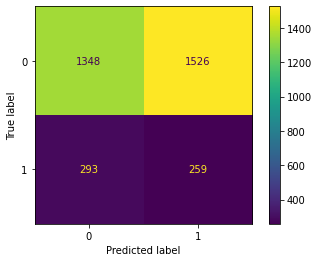

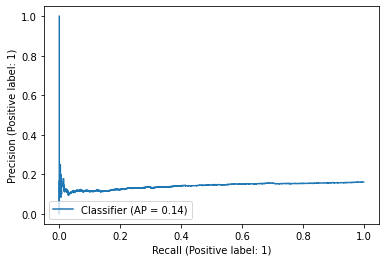

In [57]:
print("Model Evaluation -- Unsupervised Model: BERT Embedding, arguments to key points score without topic")
evaluate_classifier(np.asarray(np.asarray(predictions_GloVe_without_topic).reshape((3426, 1))), true_values)

Model Evaluation -- Unsupervised Model: BERT Embedding, arguments to key points score with topic
              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75      2029
         1.0       0.64      0.25      0.36      1397

    accuracy                           0.64      3426
   macro avg       0.64      0.58      0.55      3426
weighted avg       0.64      0.64      0.59      3426

The average precision score is: 0.218432936891832.
The balanced accuracy score is: 0.6359584430123143.
The tuned threshold is: 0.5693897008895874.
The confusion matrix is: 


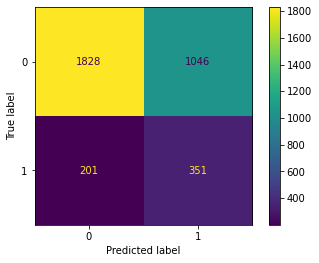

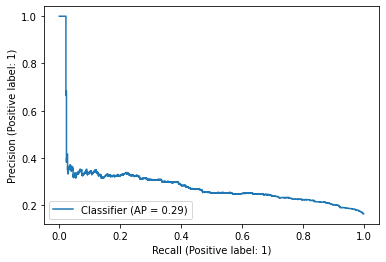

In [59]:
print("Model Evaluation -- Unsupervised Model: BERT Embedding, arguments to key points score with topic")
evaluate_classifier(np.asarray(predictions_BERT_with_topic).reshape((3426, 1)), true_values)

# **Tf-idf**
In order to assess the role of lexical overlap in the matching task, we represent each argument and key point as tf-idf weighted word vectors and use their cosine similarity as the match score.


We calaulate TF-IDF vector by our custom functions, based on standard TF-IDF formular

In [19]:
## Get unique corpus in dataset, since duplicates sentence will effect a lot in TF-IDF

test_arguments_id = labels_test['arg_id'].drop_duplicates().tolist()
test_key_point_id = labels_test['key_point_id'].drop_duplicates().tolist()
test_arguments_size = len(test_arguments_id)
test_kp_size = len(test_key_point_id)

test_arguments_corpus = []
for i in test_arguments_id:
  argument = arguments_test.loc[arguments_test['arg_id'] == i]['argument'].tolist()[0]
  test_arguments_corpus.append(argument)

test_key_points_corpus = []
for i in test_key_point_id:
  key_point = key_points_test.loc[key_points_test['key_point_id'] == i]['key_point'].tolist()[0]
  test_key_points_corpus.append(key_point)

test_corpus = test_arguments_corpus + test_key_points_corpus


nltk.download('punkt')
nltk.download('stopwords')
tokenized_test_sentences = []
for sentence in test_corpus:
  tokenized_test_sentences.append(nltk.word_tokenize(sentence))

from keras.utils import pad_sequences
pad_size = max([len(sentence) for sentence in tokenized_test_sentences])
padded_tokenized_sentences = []

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
## Custom TF-IDF vector function
def get_tf(word, sentence):
  nw = sentence.count(word)
  n = len(sentence)
  return nw/n

def get_idf(word, corpus):
  y = len(corpus)
  yw = 0
  for sentence in corpus:
    if word in sentence:
      yw += 1
  return y / (yw + 1)

def get_tfidf(corpus):
  print(f'totally {len(corpus)} to slove')
  corpus_tfidf = []
  num = 0
  for sentence in corpus:
    sentence_tfidf = []
    for word in sentence:
      tf = get_tf(word, sentence)
      idf = get_idf(word, corpus)
      tf_idf = tf * idf * 10
      sentence_tfidf.append(tf_idf)
    num += 1
    corpus_tfidf.append(sentence_tfidf)
  return corpus_tfidf

In [83]:
## Get TF-IDF vector for each sentence
test_vectorized_sentences = get_tfidf(tokenized_test_sentences)

In [ ]:
## Pad TF-IDF vector to same

padded_test_vectorized_sentences = pad_sequences(test_vectorized_sentences, maxlen = pad_size, padding = 'post')

padded_test_vectorized_arguments = padded_test_vectorized_sentences[0: test_arguments_size]
padded_test_vectorized_key_points = padded_test_vectorized_sentences[test_arguments_size:]


padded_test_vectorized_arguments_data = []
for i in range(len(test_arguments_id)):
  padded_test_vectorized_arguments_data.append([test_arguments_id[i], padded_test_vectorized_arguments[i]])
test_vectorized_arguments_dataframe = pd.DataFrame(padded_test_vectorized_arguments_data, columns=['arg_id', 'tfidf_vector'])

padded_test_vectorized_key_points_data = []
for i in range(len(test_key_point_id)):
  padded_test_vectorized_key_points_data.append([test_key_point_id[i], padded_test_vectorized_key_points[i]])
test_vectorized_key_points_dataframe = pd.DataFrame(padded_test_vectorized_key_points_data, columns=['kp_id', 'tfidf_vector'])

In [ ]:
test_data = []
for i in range(len(labels_test)):
  arg_id = labels_test['arg_id'][i]
  kp_id = labels_test['key_point_id'][i]
  label = labels_test['label'][i]
  argument_tfidf_vector = test_vectorized_arguments_dataframe.loc[test_vectorized_arguments_dataframe['arg_id'] == arg_id]['tfidf_vector'].tolist()[0]
  key_point_tfidf_vector = test_vectorized_key_points_dataframe.loc[test_vectorized_key_points_dataframe['kp_id'] == kp_id]['tfidf_vector'].tolist()[0]
  single_dataframe = [argument_tfidf_vector, key_point_tfidf_vector, label]
  test_data.append(single_dataframe)
test_dataframe = pd.DataFrame(test_data, columns=['argument_vector', 'key_point_vector', 'label'])

In [ ]:
## Calculate cossim 

from sklearn.metrics.pairwise import cosine_similarity
re = []
for i in range(len(test_dataframe)):
  cossim = cosine_similarity(test_dataframe['argument_vector'][i].reshape((1, -1)), test_dataframe['key_point_vector'][i].reshape((1, -1))).tolist()
  re.append(listFlatten(cossim))
predictions = np.asarray(re)

# **TF-IDF Evaluation**

Model Evaluation -- Unsupervised Model: TF-IDF Embedding, arguments to key points score
              precision    recall  f1-score   support

         0.0       0.48      0.83      0.61      1677
         1.0       0.48      0.15      0.23      1749

    accuracy                           0.48      3426
   macro avg       0.48      0.49      0.42      3426
weighted avg       0.48      0.48      0.42      3426

The average precision score is: 0.15702772166379614.
The balanced accuracy score is: 0.48401901606607967.
The tuned threshold is: 0.21073651313781738.
The confusion matrix is: 


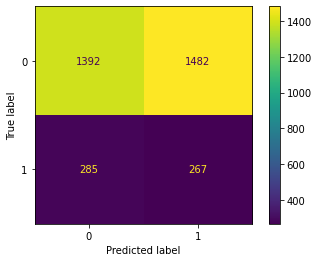

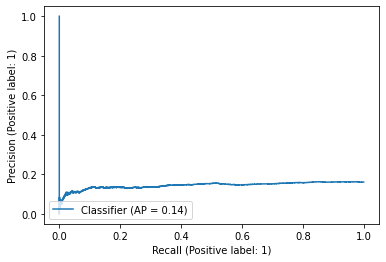

In [ ]:
print("Model Evaluation -- Unsupervised Model: TF-IDF Embedding, arguments to key points score")
evaluate_classifier(predictions, true_values)

# **Supervised approaches**

# **Neural architecture 1**

This architecture based on TF-IDF vector.


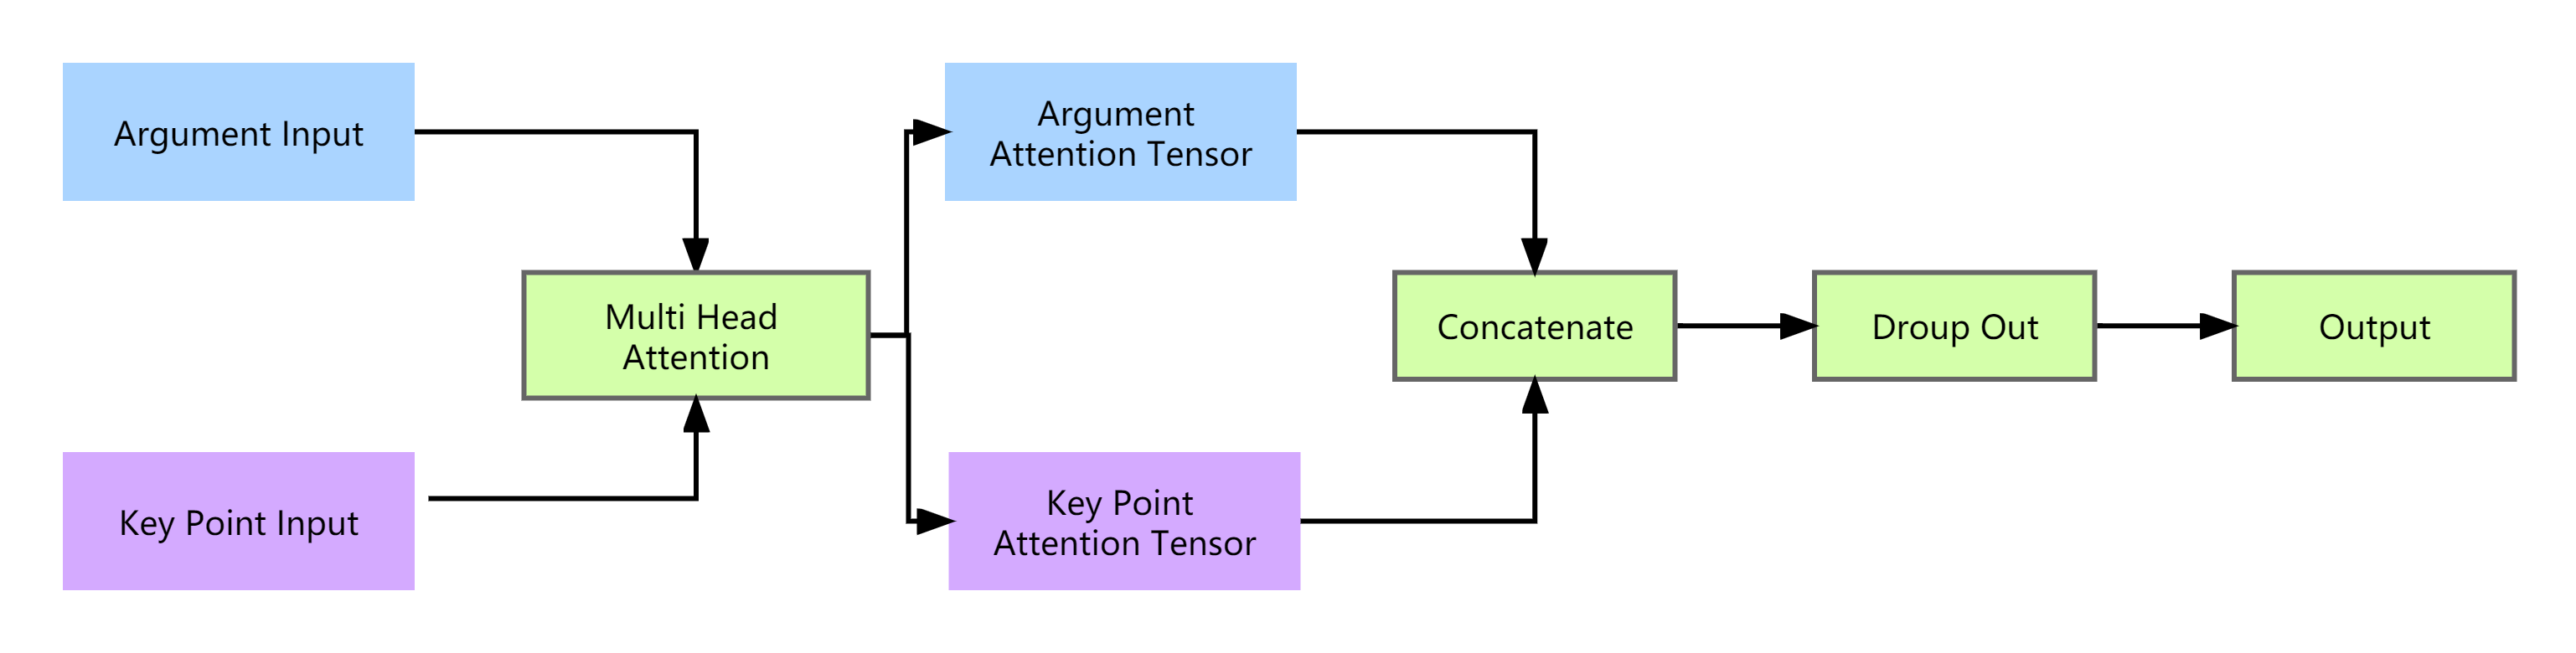

Argument and Key Point Input are TF-IDF vectors.


Multi Head Attention helps to find important part of vector.


Concatenate attention output tensor.


Output is a dense layer activated by sigmoid.

# **Train and Test Data Extraction**

Extract data from train, dev and test dataset

Manage sentences into corpus respectively





In [21]:
## Extract data from train, dev and test dataset
train_labels = pd.concat([labels_train, labels_dev], ignore_index = True).reset_index(drop=True)
train_arg_id = train_labels['arg_id']
train_kp_id = train_labels['key_point_id']
total_arguments = pd.concat([arguments_train, arguments_dev], ignore_index = True).reset_index(drop=True)
total_key_point = pd.concat([key_points_train, key_points_dev], ignore_index = True).reset_index(drop=True)

In [22]:
train_arguments_id = train_labels['arg_id'].drop_duplicates().tolist()
train_key_point_id = train_labels['key_point_id'].drop_duplicates().tolist()
train_arguments_size = len(train_arguments_id)
train_kp_size = len(train_key_point_id)

test_arguments_id = labels_test['arg_id'].drop_duplicates().tolist()
test_key_point_id = labels_test['key_point_id'].drop_duplicates().tolist()
test_arguments_size = len(test_arguments_id)
test_kp_size = len(test_key_point_id)

In [23]:
## Manage sentences into corpus respectively
train_arguments_corpus = []
for i in train_arguments_id:
  argument = total_arguments.loc[total_arguments['arg_id'] == i]['argument'].tolist()[0]
  train_arguments_corpus.append(argument)

train_key_points_corpus = []
for i in train_key_point_id:
  key_point = total_key_point.loc[total_key_point['key_point_id'] == i]['key_point'].tolist()[0]
  train_key_points_corpus.append(key_point)

In [24]:
train_corpus = train_arguments_corpus + train_key_points_corpus

In [25]:
## Tokenize sentences

tokenized_train_sentences = []
for sentence in train_corpus:
  tokenized_train_sentences.append(nltk.word_tokenize(sentence))

In [26]:
## Get TF-IDF vectors

pad_size = max([len(sentence) for sentence in tokenized_train_sentences])

train_vectorized_sentences = get_tfidf(tokenized_train_sentences)
test_vectorized_sentences = get_tfidf(tokenized_test_sentences)

totally 6758 to slove
totally 756 to slove


In [27]:
## Pad sentences

padded_train_vectorized_sentences = pad_sequences(train_vectorized_sentences, maxlen = pad_size, padding = 'post')
padded_test_vectorized_sentences = pad_sequences(test_vectorized_sentences, maxlen = pad_size, padding = 'post')

In [28]:
padded_train_vectorized_arguments = padded_train_vectorized_sentences[0: train_arguments_size]
padded_train_vectorized_key_points = padded_train_vectorized_sentences[train_arguments_size:]

padded_test_vectorized_arguments = padded_test_vectorized_sentences[0: test_arguments_size]
padded_test_vectorized_key_points = padded_test_vectorized_sentences[test_arguments_size:]

In [29]:
## Manage TF-IDF vectors into dataframe for train

padded_train_vectorized_arguments_data = []
for i in range(len(train_arguments_id)):
  padded_train_vectorized_arguments_data.append([train_arguments_id[i], padded_train_vectorized_arguments[i]])
train_vectorized_arguments_dataframe = pd.DataFrame(padded_train_vectorized_arguments_data, columns=['arg_id', 'tfidf_vector'])

padded_train_vectorized_key_points_data = []
for i in range(len(train_key_point_id)):
  padded_train_vectorized_key_points_data.append([train_key_point_id[i], padded_train_vectorized_key_points[i]])
train_vectorized_key_points_dataframe = pd.DataFrame(padded_train_vectorized_key_points_data, columns=['kp_id', 'tfidf_vector'])

padded_test_vectorized_arguments_data = []
for i in range(len(test_arguments_id)):
  padded_test_vectorized_arguments_data.append([test_arguments_id[i], padded_test_vectorized_arguments[i]])
test_vectorized_arguments_dataframe = pd.DataFrame(padded_test_vectorized_arguments_data, columns=['arg_id', 'tfidf_vector'])

padded_test_vectorized_key_points_data = []
for i in range(len(test_key_point_id)):
  padded_test_vectorized_key_points_data.append([test_key_point_id[i], padded_test_vectorized_key_points[i]])
test_vectorized_key_points_dataframe = pd.DataFrame(padded_test_vectorized_key_points_data, columns=['kp_id', 'tfidf_vector'])

In [30]:
train_data = []
for i in range(len(train_labels)):
  arg_id = train_labels['arg_id'][i]
  kp_id = train_labels['key_point_id'][i]
  label = train_labels['label'][i]
  argument_tfidf_vector = train_vectorized_arguments_dataframe.loc[train_vectorized_arguments_dataframe['arg_id'] == arg_id]['tfidf_vector'].tolist()[0]
  key_point_tfidf_vector = train_vectorized_key_points_dataframe.loc[train_vectorized_key_points_dataframe['kp_id'] == kp_id]['tfidf_vector'].tolist()[0]
  single_dataframe = [argument_tfidf_vector, key_point_tfidf_vector, label]
  train_data.append(single_dataframe)
train_dataframe = pd.DataFrame(train_data, columns=['argument_vector', 'key_point_vector', 'label'])

test_data = []
for i in range(len(labels_test)):
  arg_id = labels_test['arg_id'][i]
  kp_id = labels_test['key_point_id'][i]
  label = labels_test['label'][i]
  argument_tfidf_vector = test_vectorized_arguments_dataframe.loc[test_vectorized_arguments_dataframe['arg_id'] == arg_id]['tfidf_vector'].tolist()[0]
  key_point_tfidf_vector = test_vectorized_key_points_dataframe.loc[test_vectorized_key_points_dataframe['kp_id'] == kp_id]['tfidf_vector'].tolist()[0]
  single_dataframe = [argument_tfidf_vector, key_point_tfidf_vector, label]
  test_data.append(single_dataframe)
test_dataframe = pd.DataFrame(test_data, columns=['argument_vector', 'key_point_vector', 'label'])

In [31]:
from keras import backend as K
from keras.layers import Dense, TimeDistributed, Input, concatenate, add, average, Dropout, dot, Lambda, LSTM, Bidirectional, MaxPooling1D, Reshape, Flatten, Conv1D, MultiHeadAttention, GlobalAveragePooling1D, Concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import Constant, glorot_normal
from keras.optimizers import RMSprop, Adamax, SGD, Adam
from keras import regularizers
from keras.metrics import Precision, Recall
from keras.losses import BinaryCrossentropy, CosineSimilarity
from keras.utils import plot_model

def build_sub_TFIDF_classifier_model(batch_zise, input_shape):

  argument_input = Input(shape = (input_shape), 
                         name = 'argument_input')
  
  keypoint_input = Input(shape = input_shape,
                         name = 'keypoint_input')
 
  ## attention
  self_attention = MultiHeadAttention(8, 16)
  output_tensor_arg, weights_arg = self_attention(argument_input, argument_input, return_attention_scores=True)
  output_tensor_kp, weights_kp = self_attention(keypoint_input, keypoint_input, return_attention_scores=True)
  rep_sequences_1 = GlobalAveragePooling1D()(output_tensor_arg)
  rep_sequences_2 = GlobalAveragePooling1D()(output_tensor_kp)
 
  ## classifier
  merged = Concatenate()([rep_sequences_1, rep_sequences_2])
  O_seq = Dropout(0.5)(merged)
  outputs = Dense(1, activation='sigmoid')(O_seq)
 
  model = Model(inputs=[argument_input, keypoint_input], outputs=outputs)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [32]:
from keras.utils import Sequence
class DataGenator_co(Sequence):
  def __init__(self, batch_size, labeled_df):
    self.batch_size = batch_size
    self.labeled_df = labeled_df.copy()
    self.n = 0
    self.length = len(labeled_df)
  def __len__(self):
    return int(np.ceil(self.length / self.batch_size))

  def __getitem__(self, idx):
    data = self.labeled_df[idx * self.batch_size : (idx + 1) * self.batch_size]
    args = []
    for i in data['argument_vector']:
      args.append(np.array(i))
    kps = []
    for i in data['key_point_vector']:
      kps.append(np.array(i))
    lebel = []
    for i in data['label']:
      lebel.append(np.array(i))
    features = [np.stack(args, axis=0), np.stack(kps, axis=0)]
    return features, np.stack(lebel, axis=0)
  def print_item(self):
    features, label = self.__getitem__(0)
    return features, label
  def __next__(self):
    if self.n >= self.__len__():
        self.n = 0
    
    result = self.__getitem__(self.n)
    self.n += 1

    return result

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 argument_input (InputLayer)    [(None, 44, 1)]      0           []                               
                                                                                                  
 keypoint_input (InputLayer)    [(None, 44, 1)]      0           []                               
                                                                                                  
 multi_head_attention_1 (MultiH  ((None, 44, 1),     897         ['argument_input[0][0]',         
 eadAttention)                   (None, 8, 44, 44))               'argument_input[0][0]',         
                                                                  'keypoint_input[0][0]',         
                                                                  'keypoint_input[0][0]']   

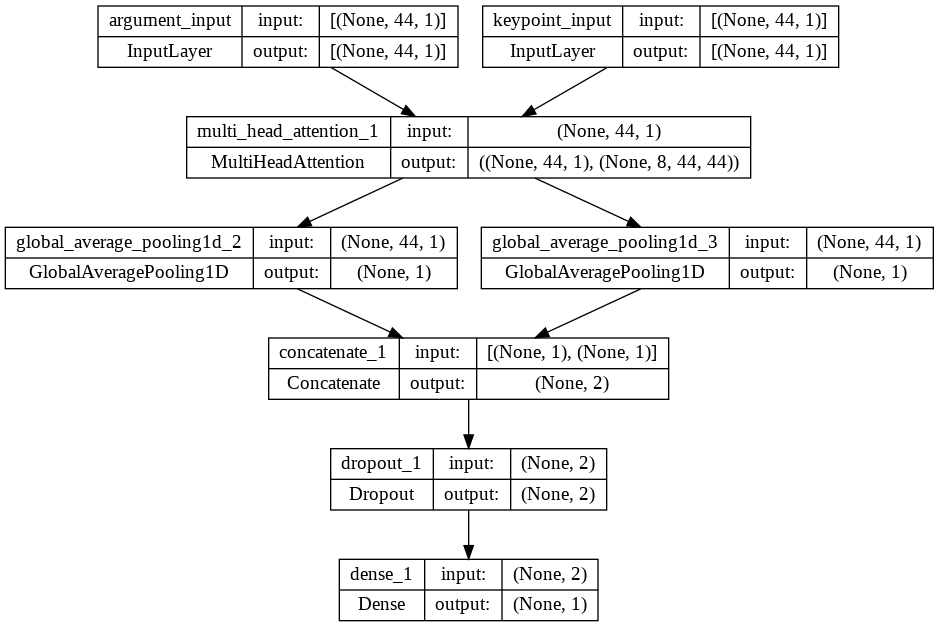

In [ ]:
model_TFIDF = build_sub_TFIDF_classifier_model(32, (44, 1))
model_TFIDF.summary()
plot_model(model_TFIDF, show_shapes = True)

In [33]:
from sklearn.model_selection import train_test_split
batch_size = 32
train_TFIDF_data, validation_TFIDF_data = train_test_split(train_dataframe, shuffle=False)
train_TFIDF_gen = DataGenator_co(batch_size, train_TFIDF_data)
validation_TFIDF_gen = DataGenator_co(batch_size, validation_TFIDF_data)
test_TDIFD_gen = DataGenator_co(batch_size, test_dataframe)

In [ ]:
checkpoint_2 = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'auto'),
              ModelCheckpoint(filepath = "/content/drive/MyDrive/NLP-project/models/model_TFIDF.h5",
                              monitor = 'val_loss', verbose = 1, save_best_only = True)]


model_TFIDF.fit(x = train_TFIDF_gen, validation_data = validation_TFIDF_gen,
            epochs = 100, callbacks = checkpoint_2)

Epoch 1/100
565/565 [==============================] - ETA: 0s - loss: 2.4296 - accuracy: 0.6081
Epoch 1: val_loss improved from inf to 1.25342, saving model to /content/drive/MyDrive/NLP-project/models/model_TFIDF_A1.h5
565/565 [==============================] - 15s 24ms/step - loss: 2.4296 - accuracy: 0.6081 - val_loss: 1.2534 - val_accuracy: 0.6595
Epoch 2/100
565/565 [==============================] - ETA: 0s - loss: 0.9691 - accuracy: 0.6653
Epoch 2: val_loss improved from 1.25342 to 0.59127, saving model to /content/drive/MyDrive/NLP-project/models/model_TFIDF_A1.h5
565/565 [==============================] - 13s 22ms/step - loss: 0.9691 - accuracy: 0.6653 - val_loss: 0.5913 - val_accuracy: 0.7108
Epoch 3/100
565/565 [==============================] - ETA: 0s - loss: 0.8409 - accuracy: 0.7061
Epoch 3: val_loss did not improve from 0.59127
565/565 [==============================] - 13s 22ms/step - loss: 0.8409 - accuracy: 0.7061 - val_loss: 1.1887 - val_accuracy: 0.4806
Epoch 4/100

# **Architecture 1 Evaluation**

108/108 [==============================] - 1s 10ms/step
Model Evaluation -- Supervised Model: TF-IDF Architecture 1, arguments to key points score
              precision    recall  f1-score   support

         0.0       0.48      0.83      0.61      1677
         1.0       0.48      0.15      0.23      1749

    accuracy                           0.48      3426
   macro avg       0.48      0.49      0.42      3426
weighted avg       0.48      0.48      0.42      3426

The average precision score is: 0.15702772166379614.
The balanced accuracy score is: 0.48401901606607967.
The tuned threshold is: 0.21073651313781738.
The confusion matrix is: 


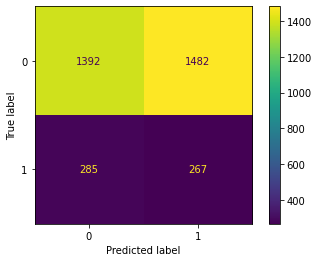

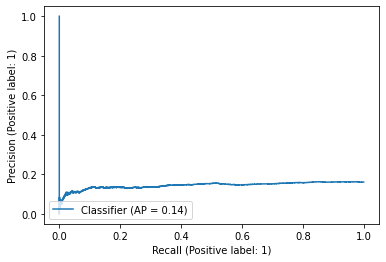

In [ ]:
from keras.models import load_model
from keras import optimizers
from keras import backend as K
saved_model_predictions = model_TFIDF.predict(test_TDIFD_gen).reshape((3426, 1))
true_label = test_dataframe['label'].tolist()
print("Model Evaluation -- Supervised Model: TF-IDF Architecture 1, arguments to key points score")
evaluate_classifier(saved_model_predictions, true_label)

# **Neural architecture 2**
The experimented neural architecture is composed by:




Stance encoder: encode the stance value (1 or -1) employing a fully-connected network with no activation function to map the scalar input to a -dimensional vector space;



BERT: extract the contextualized representation for textual inputs;



A context integration layer is done by stacking stance encoding, topic encoding and statements encoding;



Statement encoder: another fully-connected network on top of the context integration layer to get the final -dimensional embeddings for key points or arguments.

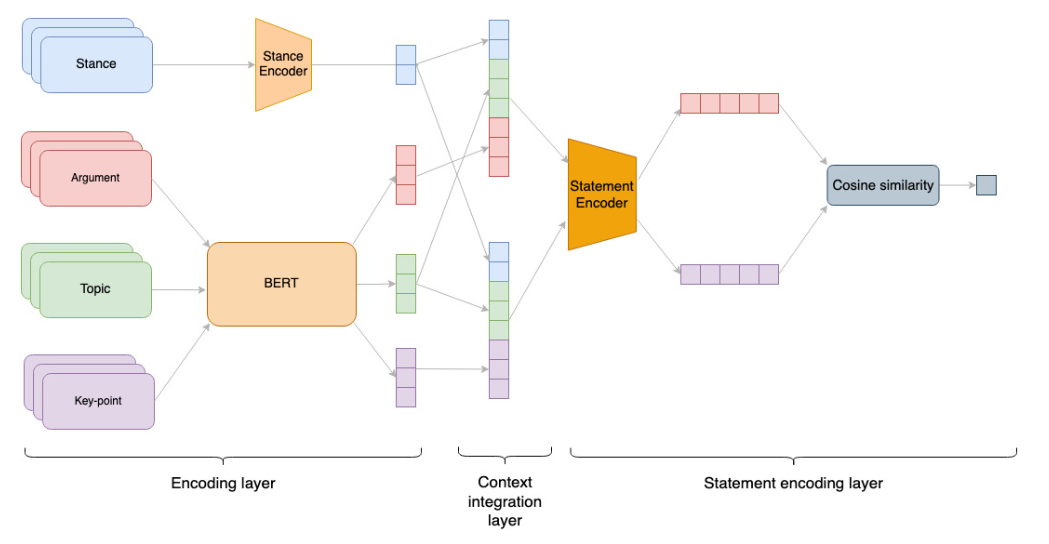

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
## Load the pre-trained BERT model.
bert_preprocess_model = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4", trainable = False)

## Dimension of BERT.
BERT_dimension = 1024

## Number of transformers choosen
no_last_TFs = 4

In [ ]:
###差不多一样

from keras.utils import Sequence
def flatten(t: list) -> list:
  # Flatten a nested list.
  return [item for sublist in t for item in sublist]

class DataGenerator(Sequence):
  def __init__(self, shuffle: bool, batch_size, 
               arguments_df, key_points_df, labels_df, 
               preprocessor, pretrained_model, no_last_TFs = 4):
    
    self.shuffle = shuffle
    self.batch_size = batch_size
    self.no_last_TFs = no_last_TFs
    self.preprocessor = preprocessor
    self.pretrained_model = pretrained_model

    self.arguments_df = arguments_df.copy()
    self.key_points_df = key_points_df.copy()
    self.labels_df = labels_df.copy()      
    
    ## Labels.
    self.labels = labels_df['label'].values

    ## Stance.
    self.stance = arguments_df['stance'].tolist()

    self.length = len(labels_df)
    self.indexes = np.arange(self.length)
    self.on_epoch_end()

    self.n = 0

  def on_epoch_end(self):
    ## Shuffle the indexes to have more robust batches.
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def __len__(self):
    ## Length of the batch.
    return int(np.ceil(self.length / self.batch_size))

  def __getitem__(self, idx):
    '''Generate one batch of data.'''
    ## Select the indexes of the batch.
    indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
    ## For each row in the labels dataframe we have the pair argument and keypoint. These two lines retrieve the pairs in the batch
    arg_id = [self.labels_df['arg_id'][k] for k in indexes]
    kp_id = [self.labels_df['key_point_id'][k] for k in indexes]

    ''' Warning: it produces nested list! '''

    ## Take the topic from the arguments dataframe that match the given argument, already paired before.
    topics = flatten([self.arguments_df.loc[self.arguments_df['arg_id'] == arg]['topic'].tolist() for arg in arg_id])
    ## Preprocces add [CLS] as 0 and [SEP] as 2 and pads with 1s.
    preprocessed_topic = self.preprocessor(topics)
    ## Encode the topics and picks the last four states of the [CLS].
    encoded_topic = np.array(self.pretrained_model(preprocessed_topic)['encoder_outputs'][-self.no_last_TFs:])[:,:,0,:]
    ## Swap axes to have the batch size at the beginning.
    encoded_topic = np.swapaxes(encoded_topic, 0, 1)
    encoded_topic = np.reshape(encoded_topic, (-1, self.no_last_TFs * BERT_dimension))

    ## Take the arguments from the arguments dataframe that match the given argument, already paired before.
    arguments = flatten([self.arguments_df.loc[self.arguments_df['arg_id'] == arg]['argument'].tolist() for arg in arg_id])
    ## Preprocces add [CLS] as 0 and [SEP] as 2 and pads with 1s.
    preprocessed_argument = self.preprocessor(arguments)
    ## Encode the arguments and picks the last four states of the [CLS].
    encoded_argument = np.array(self.pretrained_model(preprocessed_argument)['encoder_outputs'][-self.no_last_TFs:])[:,:,0,:]
    ## Swap axes to have the batch size at the beginning.
    encoded_argument = np.swapaxes(encoded_argument, 0, 1)
    encoded_argument = np.reshape(encoded_argument, (-1, self.no_last_TFs * BERT_dimension))
    ## Take the keypoint from the keypoints dataframe that match the given argument, already paired before.
    keypoints = flatten([self.key_points_df.loc[self.key_points_df['key_point_id'] == kp]['key_point'].tolist() for kp in kp_id])
    ## Preprocces add [CLS] as 0 and [SEP] as 2 and pads with 1s.
    preprocessed_keypoint = self.preprocessor(keypoints)
    ## Encode the keypoints and picks the last four states of the [CLS].
    encoded_keypoint = np.array(self.pretrained_model(preprocessed_keypoint)['encoder_outputs'][-self.no_last_TFs:])[:,:,0,:]
    ## Swap axes to have the batch size at the beginning.
    encoded_keypoint = np.swapaxes(encoded_keypoint, 0, 1)
    encoded_keypoint = np.reshape(encoded_keypoint, (-1, self.no_last_TFs * BERT_dimension))

    ## Take the stance from the arguments dataframe that match the given argument, already paired before.
    stance = np.array([self.arguments_df.loc[self.arguments_df['arg_id'] == arg]['stance'].tolist() for arg in arg_id])

    labels = np.array([self.labels[k] for k in indexes])

    features = [encoded_topic, 
                encoded_argument, 
                encoded_keypoint, 
                stance]

    return features, labels
    
  def print_item(self):
    features, labels = self.__next__()
    print(features[1].shape)

  def __next__(self):
    if self.n >= self.__len__():
        self.n = 0
    
    result = self.__getitem__(self.n)
    self.n += 1

    return result

In [ ]:
from keras.layers import Dense, TimeDistributed, Input, concatenate, add, average, Dropout, dot, Lambda, LSTM, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import Constant, glorot_normal
from keras.optimizers import RMSprop, Adamax, SGD, Adam
from keras import regularizers
from keras.metrics import Precision, Recall
from keras.losses import BinaryCrossentropy, CosineSimilarity
from keras.utils import plot_model
from keras import backend as k
from keras.layers.core import Lambda

class CosineLayer():

    def __call__(self, x1, x2):

        def _cosine(x):
            dot1 = K.batch_dot(x[0], x[1], axes=1)
            dot2 = K.batch_dot(x[0], x[0], axes=1)
            dot3 = K.batch_dot(x[1], x[1], axes=1)
            max_ = K.maximum(K.sqrt(dot2 * dot3), K.epsilon())
            return dot1 / max_

        output_shape = (1,)
        value = Lambda(
            _cosine,
            output_shape=output_shape)([x1, x2])
        return value

def build_classifier_model(no_last_TFs, BERT_dimension, 
               dropout = 0.5, recurrent_dropout: float = 0.25, 
               initial_learning_rate: float = 0.0001, N_stance = 16):
  
  
  topic_input = Input(shape = (no_last_TFs * BERT_dimension), 
                      name = 'topic_input')
  
  argument_input = Input(shape = (no_last_TFs * BERT_dimension), 
                         name = 'argument_input')
  
  keypoint_input = Input(shape = (no_last_TFs * BERT_dimension),
                         name = 'keypoint_input')

  stance_input = Input(shape = (1, ),
                       name = 'stance_input')

  stance_encoder = Dense(16, activation = None, name = 'stance_encode')(stance_input)
  # Context integration layer.
  argument_integration = concatenate([stance_encoder, topic_input, argument_input])
  keypoint_integration = concatenate([stance_encoder, topic_input, keypoint_input])


  # Statement encoder.
  st_encod_layer_01 = Dense(units = 16, activation = 'selu', 
              kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
              bias_regularizer = regularizers.l2(1e-4),
              activity_regularizer = regularizers.l2(1e-5),
              name = 'statement_encoder_01')
  
  st_encod_drop_out = Dropout(rate = dropout, name = 'statement_encoder_drop_out')

  st_encod_layer_02 = Dense(units = 32, activation = 'selu', 
              kernel_regularizer = regularizers.l1_l2(l1 = 1e-5, l2 = 1e-4),
              bias_regularizer = regularizers.l2(1e-4),
              activity_regularizer = regularizers.l2(1e-5),               
              name = 'statement_encoder_02')

  st_encod_argument_0 = st_encod_layer_01(argument_integration)
  st_encod_argument_1 = st_encod_drop_out(st_encod_argument_0)
  argument_output = st_encod_layer_02(st_encod_argument_1)

  st_encod_keypoint_0 = st_encod_layer_01(keypoint_integration)
  st_encod_keypoint_1 = st_encod_drop_out(st_encod_keypoint_0)
  keypoint_output = st_encod_layer_02(st_encod_keypoint_1)

  # Cosine similarity.
  cos_sim = CosineLayer()
  out_put = cos_sim(argument_output, keypoint_output)
  model = Model(inputs = (topic_input, argument_input, keypoint_input, stance_input), outputs = out_put)
  return model

In [ ]:

train_gen = DataGenerator(shuffle = True, batch_size = 32,
                          arguments_df = arguments_train, key_points_df = key_points_train, labels_df = labels_train, 
                          preprocessor = bert_preprocess_model, pretrained_model = bert_model)

dev_gen = DataGenerator(shuffle = True, batch_size = 32,
                        arguments_df = arguments_dev, key_points_df = key_points_dev, labels_df = labels_dev, 
                        preprocessor = bert_preprocess_model, pretrained_model = bert_model)

# No need to shuffle test data.
test_gen = DataGenerator(shuffle = False, batch_size = 32,
                         arguments_df = arguments_test, key_points_df = key_points_test, labels_df = labels_test, 
                         preprocessor = bert_preprocess_model, pretrained_model = bert_model)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 stance_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 stance_encode (Dense)          (None, 16)           32          ['stance_input[0][0]']           
                                                                                                  
 topic_input (InputLayer)       [(None, 4096)]       0           []                               
                                                                                                  
 argument_input (InputLayer)    [(None, 4096)]       0           []                               
                                                                                              

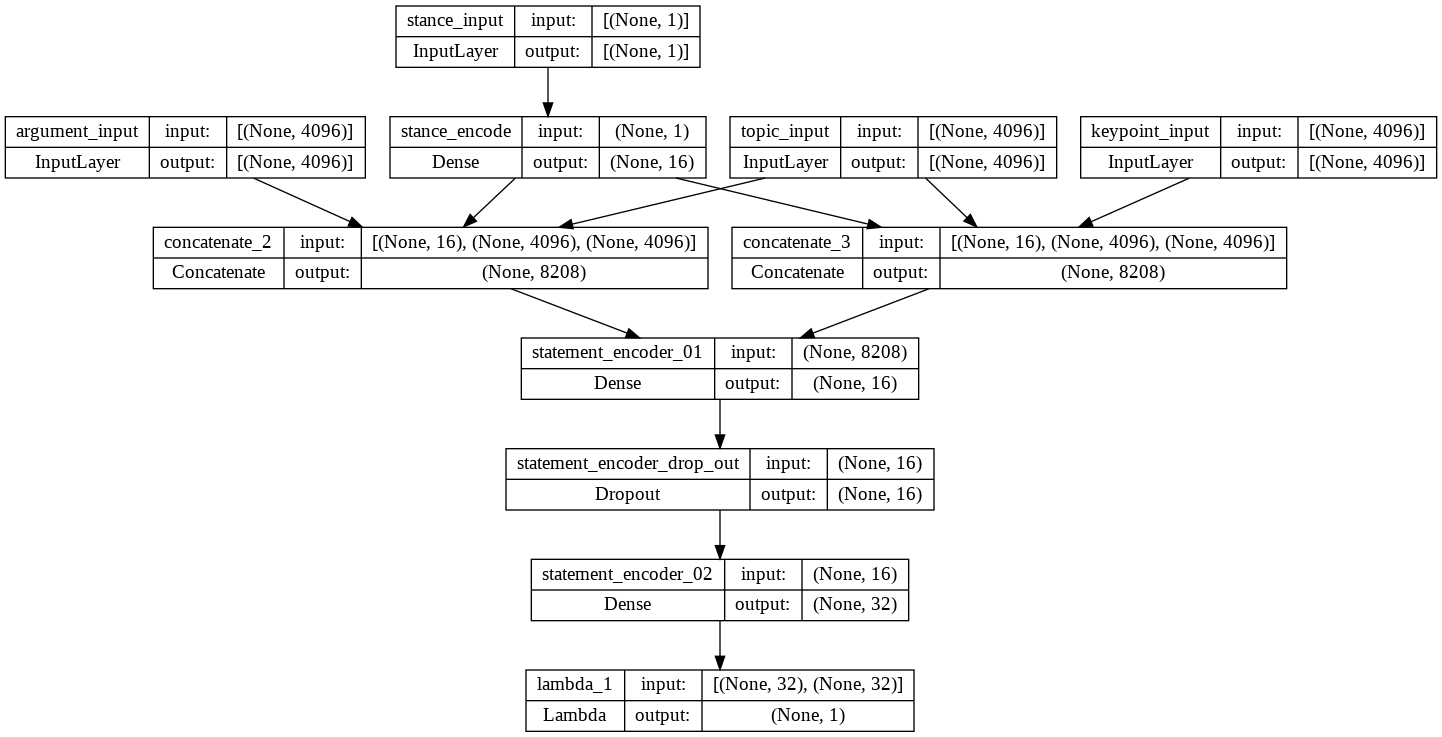

In [ ]:
from keras import backend as K
model = build_classifier_model(no_last_TFs, BERT_dimension)
model.summary()
plot_model(model, show_shapes = True)

In [ ]:
from keras import optimizers
from keras import backend as K
## Connect to GPU on Colab 
## No bug even without Colab Pro, if there is no GPU connected, it will run with CPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

model = build_classifier_model(no_last_TFs, BERT_dimension)
model.summary()
plot_model(model, show_shapes = True)
model.compile(loss = focal_loss.BinaryFocalLoss(gamma = 2),
                     optimizer = 'Adam',
                     metrics = ['binary_accuracy']) 


checkpoint = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'auto'),
              ModelCheckpoint(filepath = "/content/drive/MyDrive/NLP-project/models/model.h5",
                              monitor = 'val_loss', verbose = 1, save_best_only = True)]

model.fit(x = train_gen,
            validation_data = dev_gen,
            epochs = 100, callbacks = checkpoint)

In [ ]:
import focal_loss
from keras.models import load_model
from keras import optimizers
from keras import backend as K

reloaded_model = load_model(filepath = '/content/drive/MyDrive/NLP-project/models/model.h5')

# To change optimizers in further training.

  
reloaded_model.compile(loss = focal_loss.BinaryFocalLoss(gamma = 2),
                     optimizer = 'Adam',
                     metrics = ['binary_accuracy']) 


reloaded_model.summary()

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  
checkpoint = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'auto'),
              ModelCheckpoint(filepath = "/content/drive/MyDrive/NLP-project/models/model.h5",
                              monitor = 'val_loss', verbose = 1, save_best_only = True)]

reloaded_model.fit(x = train_gen,
                   validation_data = dev_gen,
                   epochs = 100, callbacks = checkpoint)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 stance_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 stance_encode (Dense)          (None, 16)           32          ['stance_input[0][0]']           
                                                                                                  
 topic_input (InputLayer)       [(None, 4096)]       0           []                               
                                                                                                  
 argument_input (InputLayer)    [(None, 4096)]       0           []                               
                                                                                            

In [ ]:
from keras.models import load_model
from keras import optimizers
from keras import backend as K
reloaded_model = load_model(filepath = '/content/drive/MyDrive/NLP-project/models/model.h5',
                            custom_objects = {'precision_m': precision_m, 'recall_m': recall_m, 'f1_m': f1_m})

108/108 [==============================] - 159s 1s/step
              precision    recall  f1-score   support

         0.0       0.50      0.84      0.63      1704
         1.0       0.51      0.16      0.25      1722

    accuracy                           0.50      3426
   macro avg       0.51      0.50      0.44      3426
weighted avg       0.51      0.50      0.44      3426

The average precision score is: 0.16277318415051423.
The balanced accuracy score is: 0.5059926325981059.
The tuned threshold is: 0.999998927116394.
The confusion matrix is: 


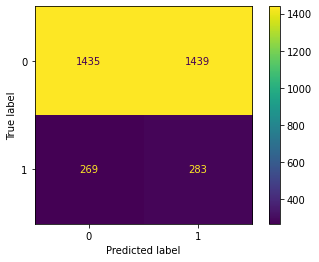

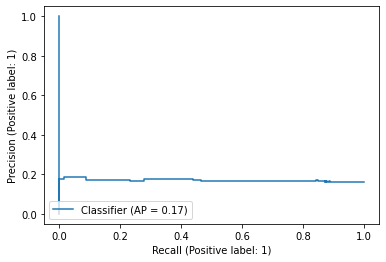

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score, PrecisionRecallDisplay, roc_curve, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, average_precision_score, PrecisionRecallDisplay, ConfusionMatrixDisplay
predictions = reloaded_model.predict(test_gen)
  
evaluate_classifier(predictions, labels_test['label'].to_numpy())